# Single Correlations

Analog to investigate-regression-output but just for a single system and single variable.

In [1]:
# Numerics
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ocn-clim')
import seaborn as sns
import esmtools as et

# Functions

In [2]:
def load_correlation(EBU, VARX, VARY='FG_ALT_CO2', smooth=0, lag=0):
    """
    Loads in the correlations between a predictor (VARX) and the predicted variable
    within the EBUS (VARY, e.g. FG_ALT_CO2). You can designate the smoothing (in years)
    and lag (in months). It automatically filters out any insignificant results.
    """
    filepath = ('/glade/work/rbrady/EBUS_BGC_Variability/' +
               'area_weighted_regional_regressions/' + EBU + '/' + VARY + '/' + VARX + '/')
    if smooth == 0:
        filename = (VARX + '.' + VARY + '.' + EBU + '.unsmoothed.area_weighted_regional_regression.'
                    + 'lag' + str(lag) + '.nc')
    else:
        filename = (VARX + '.' + VARY + '.' + EBU + '.smoothed' + str(smooth) +
                    '.area_weighted_regional_regression.lag' + str(lag) + '.nc')
    ds = xr.open_dataset(filepath + filename)
    ds = ds.where(ds.p < 0.1, drop=True)
    df = ds['r'].to_dataframe()
    df['smooth'] = int(smooth/12)
    df['variable'] = VARY
    df['lag'] = lag
    df['index'] = VARX.upper()
    df['p'] = ds['p']
    return df

# Visualization: Strip Plot (Compare Indices)

In [7]:
df1 = load_correlation('HumCS', 'NINO34', VARY='FG_CO2', smooth=0)
df2 = load_correlation('HumCS', 'NINO3', VARY='FG_CO2', smooth=0)
df3 = load_correlation('HumCS', 'NINO4', VARY='FG_CO2', smooth=0)
df4 = load_correlation('HumCS', 'NINO12', VARY='FG_CO2', smooth=0)

In [8]:
df = pd.concat([df1,df2,df3,df4])

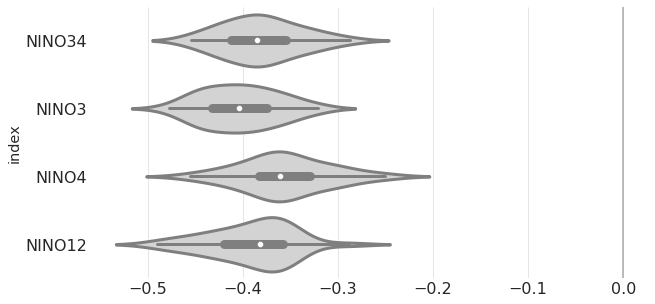

In [10]:
sns.set_style('whitegrid')
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(111)
#sns.stripplot(x="r", y="index", data=df, orient='h',
#              color='k', jitter=False, size=5)

sns.violinplot(x='r', y='index', data=df, orient='h', color='#d3d3d3')

sns.despine(left=True, bottom=True)
#ax.set(xlim=[-0.2,0.4], ylabel='', xlabel='r-value', 
#       title='Canary Current F$_{\mathrm{CO}_{2}}$ and Atlantic Variability')
#ax.set_ylabel('Smoothing (yrs)')
ax.set_xlabel('')
ax.tick_params(labelsize=16)

ax.plot([0,0],[-1,3.5],color='#a9a9a9',linewidth=1.5)

# Save.
#et.vis.savefig('CanCS_violin', extension='.eps', dpi=300)

# Visualization: Strip Plot (Compare lags and smoothing)

In [ ]:
df = load_correlation('nino34')
for i in [1,2,3,4,5]:
    df = pd.concat([df, load_correlation('nino34', lag=i)])

#for i in [1,2,3,4,5]:
#    df = pd.concat([df, load_correlation('PDO', lag=i)])
#for s in [12,24,36,48,60]:
#    for i in range(6):
#        df = pd.concat([df, load_correlation('PDO', lag=i, smooth=s)])

In [ ]:
sns.set_style('whitegrid')
f = plt.figure(figsize=(8,4)) 
ax = f.add_subplot(111)
sns.stripplot(x="lag", y="r", color='k',
              data=df, jitter=True)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
           title="Lag (months)")
ax.set(ylabel='', xlabel='Smoothing (yrs)')
ax.set_title('Corr(PDO, F$_{\mathrm{Nat}}$)', fontsize='x-large')
ax.set_ylim([0,0.75])